In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

data = pd.read_csv("Housing.csv")

In [3]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


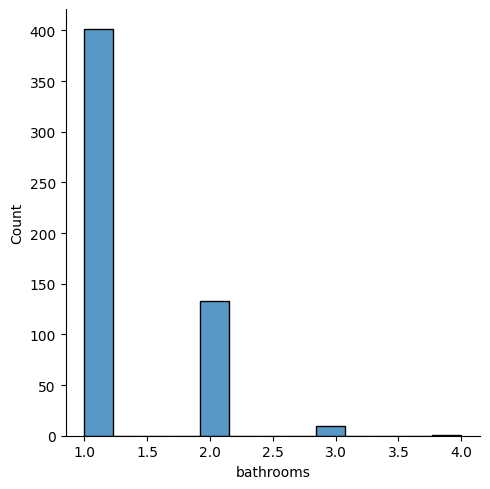

In [4]:
#3)univariate analysis
sns.displot(data.bathrooms)

([<matplotlib.patches.Wedge at 0x7f4f2ced89a0>,
 [Text(0.28521128309432414, 1.0623815340995388, 'furnished'),
  Text(-0.9645476294288756, -0.5288174264934321, 'unfurnished'),
  Text(0.7608233961924185, -0.7944480850289933, 'semi-furnished')],
 [Text(0.15556979077872224, 0.5794808367815666, '41.65%'),
  Text(-0.5261168887793867, -0.2884458689964175, '32.66%'),
  Text(0.4149945797413191, -0.43333531910672357, '25.69%')])

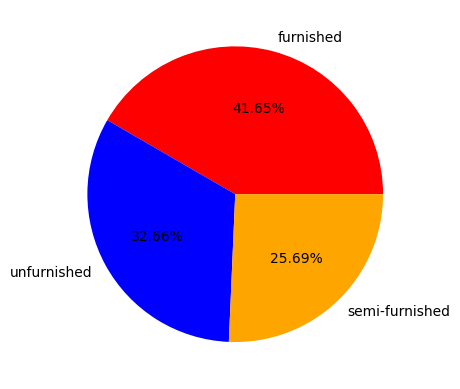

In [5]:
#univariate analysis
plt.pie(data.furnishingstatus.value_counts(),colors=['red','blue','orange'],labels=['furnished','unfurnished','semi-furnished'],autopct='%.2f%%')

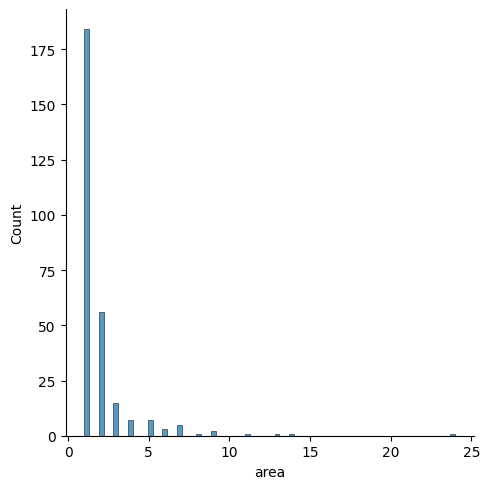

In [6]:
#univariate analysis
sns.displot(data.area.value_counts())

([<matplotlib.patches.Wedge at 0x7f4f2cc47280>,
 [Text(-0.9934118007563487, 0.47236955248833384, 'yes'),
  Text(0.9934118007563486, -0.47236955248833395, 'no')],
 [Text(-0.5418609822307356, 0.2576561195390912, '85.87%'),
  Text(0.5418609822307355, -0.25765611953909123, '14.13%')])

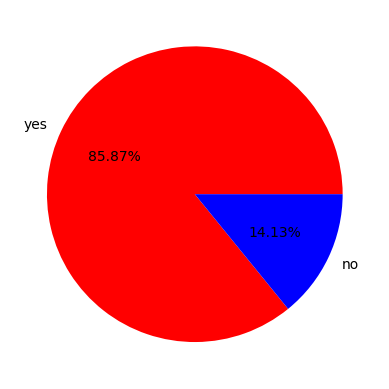

In [7]:
#univariate analysis
plt.pie(data.mainroad.value_counts(),colors=['red','blue'],labels=['yes','no'],autopct='%.2f%%')

Text(0, 0.5, 'area')

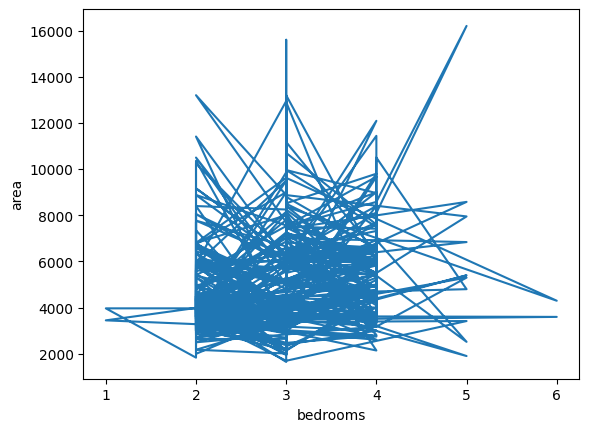

In [8]:
#bivariate analysis
plt.plot(data['bedrooms'],data['area'])
plt.xlabel('bedrooms')
plt.ylabel('area')

Text(0, 0.5, 'area')

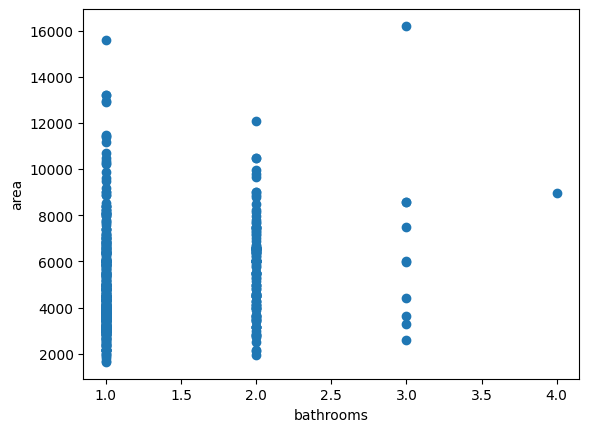

In [9]:
#bivariate analysis
plt.scatter(data['bathrooms'],data['area'])
plt.xlabel('bathrooms')
plt.ylabel('area')

Text(0, 0.5, 'area')

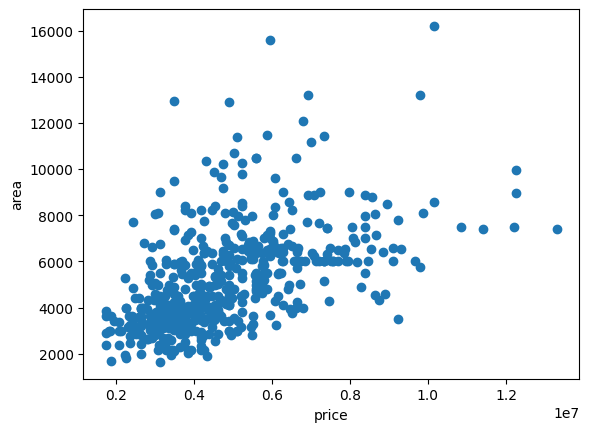

In [10]:
#bivariate analysis
plt.scatter(data['price'],data['area'])
plt.xlabel('price')
plt.ylabel('area')

Text(0, 0.5, 'bathrooms')

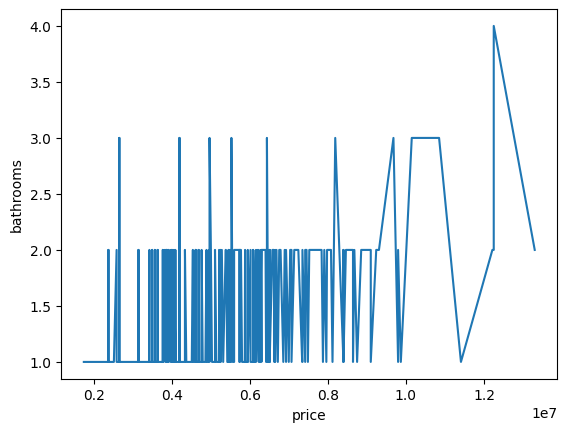

In [11]:
#bivariate analysis
plt.plot(data['price'],data['bathrooms'])
plt.xlabel('price')
plt.ylabel('bathrooms')

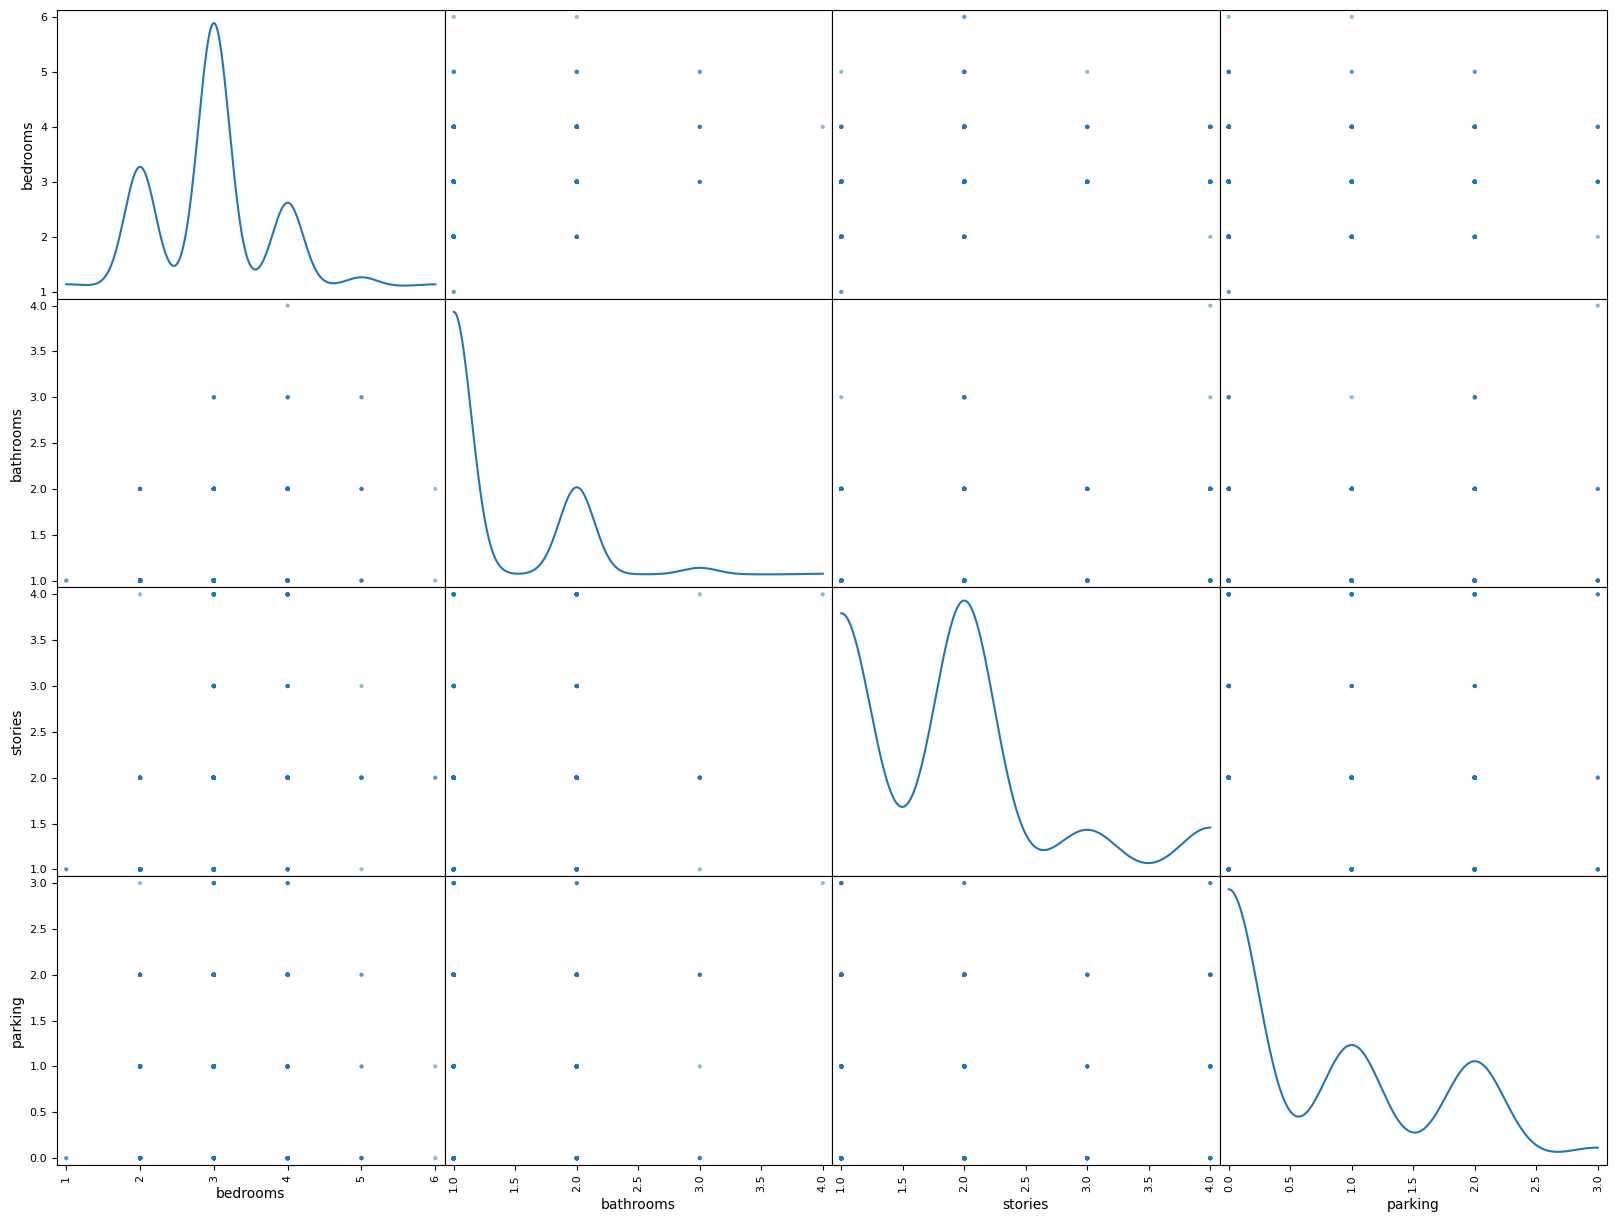

In [12]:
#Multivariate Analysis
pd.plotting.scatter_matrix(data.loc[:, 'bedrooms':'parking'], diagonal="kde",figsize=(20,15))
plt.show()

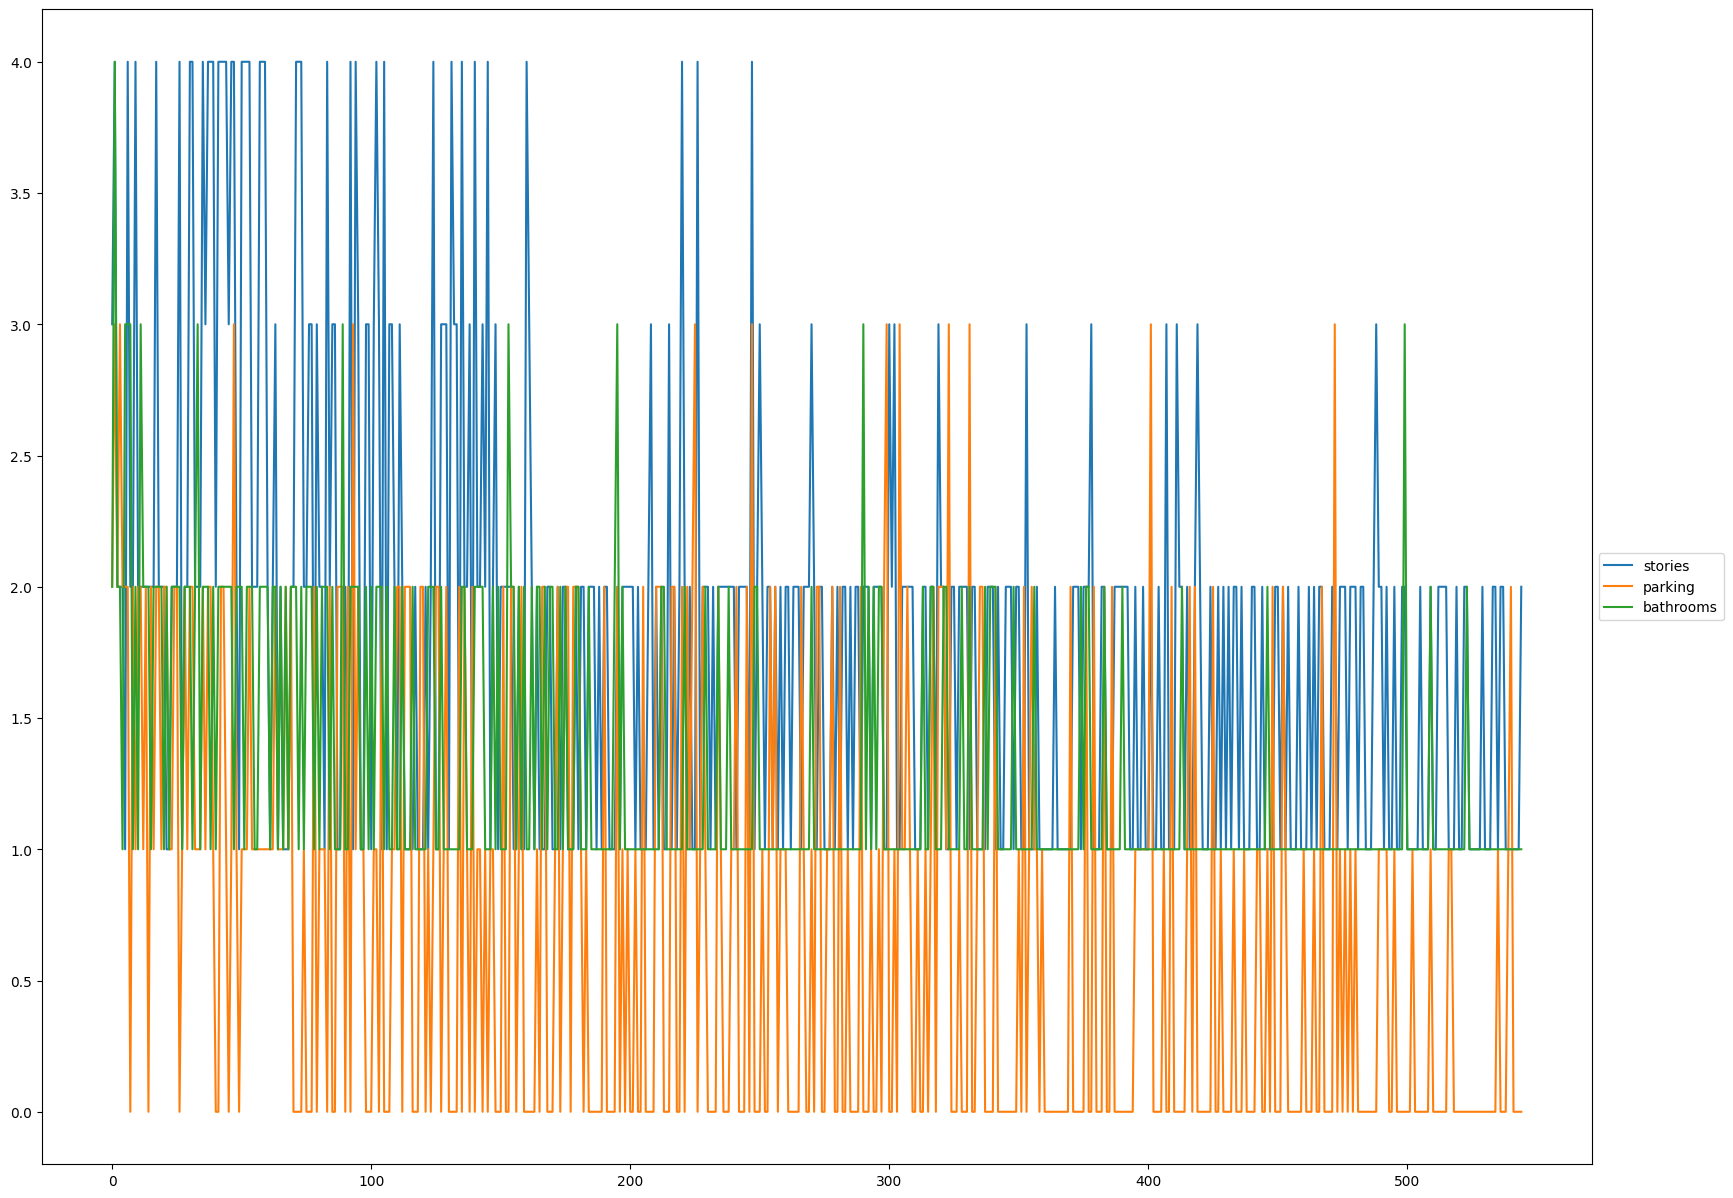

In [13]:
#multivariate analysis
ax = data[["stories","parking","bathrooms"]].plot(figsize=(20,15))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [14]:
#4) Descriptive statistics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [15]:
#Descriptive statistics
data.var()

<ipython-input-15-19e7b7033a6f>:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


price        3.498544e+12
area         4.709512e+06
bedrooms     5.447383e-01
bathrooms    2.524757e-01
stories      7.525432e-01
parking      7.423300e-01
dtype: float64

In [16]:
#Descriptive statistics
data.median()

<ipython-input-16-1dee445eb61e>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [17]:
#Descriptive statistics
data.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Handling missing values
data.isnull().any()

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
furnishingstatus    False
dtype: bool

In [19]:
#Handling missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

<Axes: >

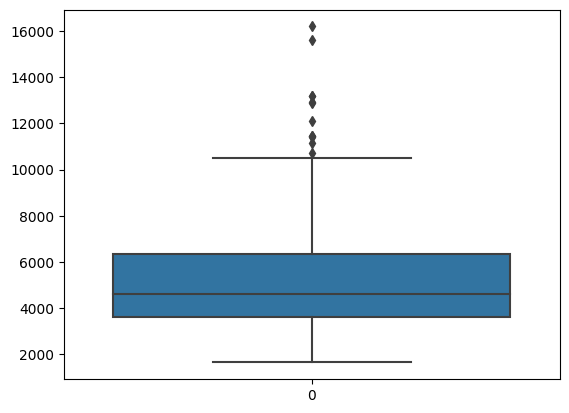

In [20]:
#6)Finding outliers
data_new = pd.read_csv("Housing.csv")
sns.boxplot(data_new.area)

In [21]:
#Finding outliers
perc99=data.area.quantile(0.95)
perc99

9000.0

<Axes: >

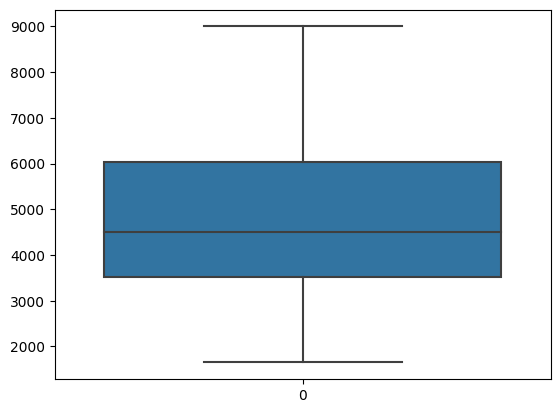

In [22]:
#Finding outliers
data_new = pd.read_csv("Housing.csv")
data_new=data_new[data_new.area<=perc99]
sns.boxplot(data_new.area)

In [23]:
#7)Checking for categorical columns
le=LabelEncoder()

In [24]:
#Checking for categorical columns
data.basement=le.fit_transform(data.basement)

In [25]:
data.basement

0      0
1      0
2      1
3      1
4      1
      ..
540    1
541    0
542    0
543    0
544    0
Name: basement, Length: 545, dtype: int64

In [26]:
#Checking for categorical columns
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,0,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,0,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,1,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,1,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,1,no,yes,2,furnished


In [27]:
#Checking for categorical columns
le=LabelEncoder()

In [28]:
#Checking for categorical columns
data.mainroad=le.fit_transform(data.mainroad)

In [29]:
#Checking for categorical columns
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,no,0,no,yes,2,furnished
1,12250000,8960,4,4,4,1,no,0,no,yes,3,furnished
2,12250000,9960,3,2,2,1,no,1,no,no,2,semi-furnished
3,12215000,7500,4,2,2,1,no,1,no,yes,3,furnished
4,11410000,7420,4,1,2,1,yes,1,no,yes,2,furnished


In [30]:
#Checking for categorical columns
le=LabelEncoder()

In [31]:
#Checking for categorical columns
data.guestroom=le.fit_transform(data.guestroom)

In [32]:
#Checking for categorical columns
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,furnished


In [33]:
#8)Splitting data into dependent and independent variables
y=data['guestroom']

In [34]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: guestroom, dtype: int64

In [35]:
X=data.drop(columns=['guestroom','bedrooms','bathrooms'],axis=1)

In [36]:
X.head()

,price,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,3,1,0,no,yes,2,furnished
1,12250000,8960,4,1,0,no,yes,3,furnished
2,12250000,9960,2,1,1,no,no,2,semi-furnished
3,12215000,7500,2,1,1,no,yes,3,furnished
4,11410000,7420,2,1,1,no,yes,2,furnished


In [37]:
#9)#Scaling independent variables
X=data.drop(columns=['mainroad','hotwaterheating','guestroom','airconditioning','price','furnishingstatus','basement'],axis=1)

In [38]:
#Scaling independent variables
name=X.columns

In [39]:
name

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [40]:
scale=MinMaxScaler()

In [41]:
X_scaled=scale.fit_transform(X)

In [42]:
X_scaled

array([[0.39656357, 0.6       , 0.33333333, 0.66666667, 0.66666667],
       [0.5024055 , 0.6       , 1.        , 1.        , 1.        ],
       [0.57113402, 0.4       , 0.33333333, 0.33333333, 0.66666667],
       ...,
       [0.13539519, 0.2       , 0.        , 0.        , 0.        ],
       [0.08659794, 0.4       , 0.        , 0.        , 0.        ],
       [0.15120275, 0.4       , 0.        , 0.33333333, 0.        ]])

In [43]:
X=pd.DataFrame(X_scaled,columns=name)

In [44]:
X

,area,bedrooms,bathrooms,stories,parking
0,0.396564,0.6,0.333333,0.666667,0.666667
1,0.502405,0.6,1.000000,1.000000,1.000000
2,0.571134,0.4,0.333333,0.333333,0.666667
3,0.402062,0.6,0.333333,0.333333,1.000000
4,0.396564,0.6,0.000000,0.333333,0.666667
...,...,...,...,...,...
540,0.092784,0.2,0.000000,0.000000,0.666667
541,0.051546,0.4,0.000000,0.000000,0.000000
542,0.135395,0.2,0.000000,0.000000,0.000000
543,0.086598,0.4,0.000000,0.000000,0.000000


In [45]:
#10)Splitting the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking
542,0.135395,0.2,0.0,0.0,0.0
496,0.161512,0.2,0.0,0.0,0.0
484,0.095533,0.2,0.0,0.0,0.0
507,0.134021,0.2,0.0,0.0,0.0
252,0.564261,0.4,0.0,0.0,0.0


In [47]:
X_test.head()

,area,bedrooms,bathrooms,stories,parking
239,0.161512,0.4,0.0,0.333333,0.333333
113,0.547766,0.4,0.0,0.000000,0.666667
325,0.124399,0.6,0.0,0.333333,0.000000
66,0.793814,0.2,0.0,0.000000,0.333333
479,0.138144,0.6,0.0,0.333333,0.000000


In [48]:
y_train

542    0
496    0
484    0
507    0
252    0
      ..
70     0
277    0
9      1
359    0
192    1
Name: guestroom, Length: 436, dtype: int64

In [49]:
y_test

239    0
113    0
325    0
66     0
479    0
      ..
76     0
132    0
311    0
464    0
155    0
Name: guestroom, Length: 109, dtype: int64

In [70]:
#11) Building the model
data.guestroom=le.fit_transform(data.guestroom)
data.mainroad=le.fit_transform(data.mainroad)
data.basement=le.fit_transform(data.basement)
data.hotwaterheating=le.fit_transform(data.hotwaterheating)
data.airconditioning=le.fit_transform(data.airconditioning)
data.furnishingstatus=le.fit_transform(data.furnishingstatus)

In [71]:
y=data["price"]
x=data.drop(columns=["price"],axis=1)

In [72]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [82]:
#12) Training the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.02,random_state=0)

In [83]:
model=LinearRegression()
model

LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [85]:
#13) Testing the model
pred=model.predict(x_test)
pred

array([4135651.20987334, 5915391.60551599, 4503724.84132434,
       7298201.61178024, 2929826.56351604, 7158178.12836891,
       3442875.24461296, 3251470.91854816, 2954902.20842428,
       8668766.32561166, 6868937.43802883])

In [86]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
103    6195000
386    3535000
480    2940000
400    3500000
37     7980000
71     6755000
Name: price, dtype: int64

In [87]:
E=pred-y_test
E

239   -449348.790127
113   -167608.394484
325    496224.841324
66     368201.611780
479    -10173.436484
103    963178.128369
386    -92124.755387
480    311470.918548
400   -545097.791576
37     688766.325612
71     113937.438029
Name: price, dtype: float64

In [88]:
#14) Performance metrics
r2_score(pred,y_test)*100

94.25098215638069

In [98]:
n=10
sum=0
for j in range(n):
  sum=sum+abs(y[j]-pred[j])
mae=sum/n
print("MAE: ",mae)


sum=0
for j in range(n):
  sum=sum+((y[j]-pred[j])**2)
mse=sum/n
print("MSE: ",mse)

MAE:  6198601.134242406
MSE:  43550862079266.89
